$$ Deep \space Learning $$
$$ diabetes dataset $$




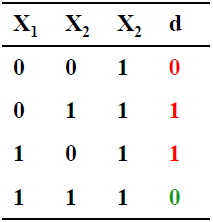

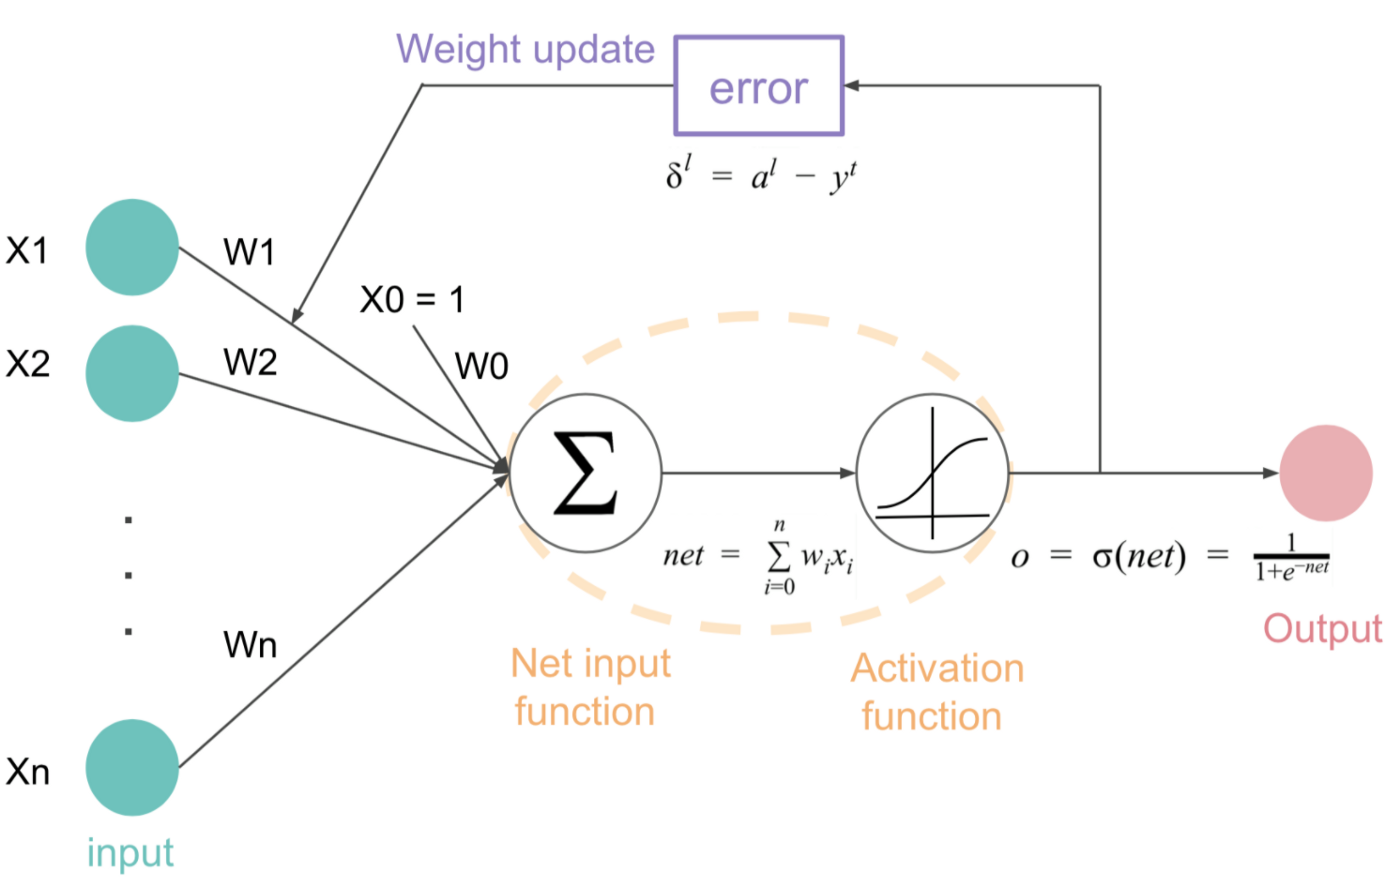

- Backpropagation plays a critical role in how neural networks improve over time. Here's why:
    1. Efficient Weight Update: It computes the gradient of the loss function with respect to each weight using the chain rule making it possible to update weights efficiently.
    2. Scalability: The backpropagation algorithm scales well to networks with multiple layers and complex architectures making deep learning feasible.
    3. Automated Learning: With backpropagation the learning process becomes automated and the model can adjust itself to optimize its performance.
    
- Working of Backpropagation Algorithm:
The Backpropagation algorithm involves two main steps: the Forward Pass and the Backward Pass.

## `i` Implementation

In [3]:
import numpy as np

np.random.seed = 42

In [67]:
class ANN:
    def __init__(self, X, y, lr=0.999, patience=10):
        self.x = X
        self.y = y
        self.W = np.random.rand(X.shape[1], 1)  # Initialize weight randomly
        self.lr = lr
        self.patience = patience  # For early stopping
        

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))


    def sigmoid_derivative(self, p):
        return p * (1 - p)


    def feedforward(self):
        self.y_pred = self.sigmoid(np.dot(self.x, self.W))



    def backprop(self):
        # Calculate the error (Log Loss gradient)
        self.loss = self.y_pred - self.y

        # Calculate the gradient
        self.gradient = np.dot(self.x.T, self.loss * self.sigmoid_derivative(self.y_pred))
        self.W -= self.lr * self.gradient




    def fit(self, iterations, verbose=1):
        prev_loss = float('inf')  # To track previous loss
        patience_counter = 0  # For early stopping
        
        for i in range(iterations):
            # 1️⃣ Forward Pass
            self.feedforward()
            
            # 2️⃣ Backpropagation Step
            self.backprop()
            
            # 3️⃣ Log Loss Calculation
            current_loss = -np.mean(self.y * np.log(self.y_pred) + (1 - self.y) * np.log(1 - self.y_pred))
            
            # 4️⃣ Early Stopping Condition
            if current_loss >= prev_loss:
                patience_counter += 1
                if patience_counter >= self.patience:
                    print("Early Stopping: No improvement in loss.")
                    break
            else:
                patience_counter = 0  # Reset patience
            
            prev_loss = current_loss
            
            # 5️⃣ Print Loss (optional)
            if verbose and i % 10 == 0:
                print(f"Epoch {i}, Loss: {current_loss}")


## `ii` Testing

In [68]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [69]:
model = ANN(X, y)
model.fit(iterations=1000, verbose=1)

Epoch 0, Loss: 0.7247470657752833
Epoch 10, Loss: 0.376251600764318
Epoch 20, Loss: 0.26179254057616413
Epoch 30, Loss: 0.2050344461818021
Epoch 40, Loss: 0.17140477895422934
Epoch 50, Loss: 0.14906006635480082
Epoch 60, Loss: 0.13303678357087328
Epoch 70, Loss: 0.1209149870989692
Epoch 80, Loss: 0.11137723970291497
Epoch 90, Loss: 0.1036446448287281
Epoch 100, Loss: 0.09722649593865584
Epoch 110, Loss: 0.0917977166738267
Epoch 120, Loss: 0.08713402230890349
Epoch 130, Loss: 0.08307539623994836
Epoch 140, Loss: 0.07950442425706666
Epoch 150, Loss: 0.07633287356666373
Epoch 160, Loss: 0.0734930676508057
Epoch 170, Loss: 0.07093216527250087
Epoch 180, Loss: 0.06860826023187652
Epoch 190, Loss: 0.06648765771750859
Epoch 200, Loss: 0.064542931497138
Epoch 210, Loss: 0.062751511672131
Epoch 220, Loss: 0.061094640602960104
Epoch 230, Loss: 0.059556589187184476
Epoch 240, Loss: 0.05812406041002144
Epoch 250, Loss: 0.056785729698787826
Epoch 260, Loss: 0.05553188663045447
Epoch 270, Loss: 0.05

In [ ]:
# model = ANN(X, y)
# model.fit(iterations=1000, verbose=1)

Iteration 0 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0. 0. 0. 0.]
Loss: 
0.5


Iteration 100 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.11504046 0.90731899 0.92611163 0.09217464]
Loss: 
0.008944932654097947


Iteration 200 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.0771188  0.93765553 0.95024519 0.06174211]
Loss: 
0.0040304431756698275


Iteration 300 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.06139297 0.95028367 0.96022288 0.04924035]
Loss: 
0.0025619102738289015


Iteration 400 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.0523564  0.95755655 0.96597407 0.04205927]
Loss: 
0.0018673462427653234


Iteration 500 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.0463365  0.96240894 0.96981765 0.03727093

----

- Modify the above designed code to implement a `multi layer perceptron`, `MLP` (an ANN with one input layer, one hidden layer and one output layer) for the same data points above
- Assume `sigmoid` activation function and there is `no bias` for simplicity (b=0)
- Test your approach using `different iteration numbers` and `different number of nodes` for the hidden layer (e.g. 4, 8 and 16)

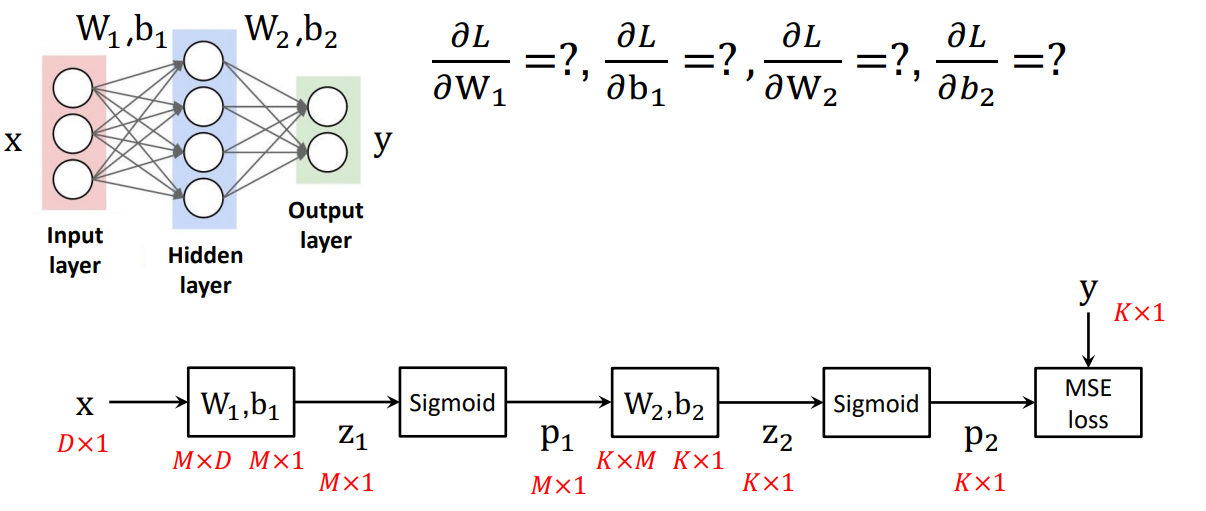

## `i` Implementation

In [30]:
# # `02` Assignment 02
# - Modify the above designed code to implement a `multi layer perceptron`, `MLP` (an ANN with one input layer, one hidden layer and one output layer) for the same data points above
# - Assume `sigmoid` activation function and there is `no bias` for simplicity (b=0)
# - Test your approach using `different iteration numbers` and `different number of nodes` for the hidden layer (e.g. 4, 8 and 16)

class ANN:
    def __init__(self, X, y, num_hidden_nodes, lr=0.2):
        self.x = X
        self.y = y
        self.W1 = np.random.rand(X.shape[1], num_hidden_nodes)
        self.W2 = np.random.rand(num_hidden_nodes, 1)
        self.lr = lr



    def sigmoid(self, z):
        return 1/(1+np.exp(-z))


    def sigmoid_derivative(self, p):
        return p * (1 - p)
    

    def feedforward(self):
        self.z1 = np.dot(self.x, self.W1)
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2)
        self.y_pred = self.sigmoid(self.z2)


    def backprop(self):
        self.loss = self.y_pred - self.y
        self.dW2 = np.dot(self.a1.T, self.loss * self.sigmoid_derivative(self.y_pred))
        self.dW1 = np.dot(self.x.T, np.dot(self.loss * self.sigmoid_derivative(self.y_pred), self.W2.T) * self.sigmoid_derivative(self.a1))
        self.W1 -= self.lr * self.dW1
        self.W2 -= self.lr * self.dW2


    def fit(self, iterations, verbose=1):
        pass
        for i in range(iterations):
            # 1️⃣ Forward Pass
            self.feedforward()
            
            # 2️⃣ Backpropagation Step
            self.backprop()
            
            # 3️⃣ Log Loss Calculation
            current_loss = -np.mean(self.y * np.log(self.y_pred) + (1 - self.y) * np.log(1 - self.y_pred))
            
            # 4️⃣ Print Loss (optional)
            if verbose and i % 10 == 0:
                print(f"Epoch {i}, Loss: {current_loss}")



## `ii` Testing

In [31]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [32]:
model = ANN(X, y, 8, lr=0.9)
model.fit(iterations=1000, verbose=1)

Epoch 0, Loss: 1.8745360708398304
Epoch 10, Loss: 0.6769926821740029
Epoch 20, Loss: 0.6457130833947982
Epoch 30, Loss: 0.5929922758868253
Epoch 40, Loss: 0.5058123056316166
Epoch 50, Loss: 0.39332034433964674
Epoch 60, Loss: 0.2897336675721586
Epoch 70, Loss: 0.21626048045138185
Epoch 80, Loss: 0.16938486254179655
Epoch 90, Loss: 0.13917763426367624
Epoch 100, Loss: 0.11868432055754059
Epoch 110, Loss: 0.10401444597622965
Epoch 120, Loss: 0.09302432858956584
Epoch 130, Loss: 0.08448297254984771
Epoch 140, Loss: 0.0776460934016098
Epoch 150, Loss: 0.07204125287174244
Epoch 160, Loss: 0.0673554868383431
Epoch 170, Loss: 0.06337372282085628
Epoch 180, Loss: 0.05994343882348519
Epoch 190, Loss: 0.056953507589421574
Epoch 200, Loss: 0.054321046810582134
Epoch 210, Loss: 0.051982968936011675
Epoch 220, Loss: 0.04989038884614028
Epoch 230, Loss: 0.04800482511321258
Epoch 240, Loss: 0.04629555908042781
Epoch 250, Loss: 0.04473776044652032
Epoch 260, Loss: 0.04331113192642264
Epoch 270, Loss: 

In [ ]:
model = ANN(X, y, 8)
model.fit(iterations=1000, verbose=1)

Iteration 0 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0. 0. 0. 0.]
Loss: 
0.5


Iteration 100 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.05656498 0.94819957 0.95836595 0.04626216]
Loss: 
0.002439115645221845


Iteration 200 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.03383028 0.96893563 0.97482231 0.0278645 ]
Loss: 
0.000879957370796992


Iteration 300 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.02585985 0.97621884 0.98063297 0.0213894 ]
Loss: 
0.0005167158349405886


Iteration 400 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.02156481 0.98014706 0.98378284 0.01788724]
Loss: 
0.0003605326040343141


Iteration 500 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.01880431 0.98267343 0.98581647 0.01562988]

---

- Use the `Keras` library tensorflow keras to build different ANNs using different numbers of hidden layers:
  - `shallow`  : 1 hidden, output layer
  - `deeper`   : two hidden layers with 12 and 8 nodes respectively
  - `more deep`: three hidden layers with 32 16 8 nodes respectively

Use the diabetic dataset provided [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) to train and test your design Use the `ReLU` activation for the hidden layers and the `sigmoid` activation for the output neuron,
- `loss='binary_crossentropy'`
- `optimizer='adam'`
- `metrics=['accuracy’]`
- `epochs=150`

## `0` Import Libraries & Load Dataset

In [1]:
# %pip install tensorflow 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
np.random.seed = 42

2025-03-18 13:24:24.022382: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-18 13:24:24.036225: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-18 13:24:24.145578: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-18 13:24:24.265649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742297064.416396    4246 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742297064.46

In [23]:
dataset = pd.read_csv('diabetes.csv')

In [24]:
X = dataset.drop(columns=["Outcome"])
y = dataset["Outcome"]

In [25]:
X.shape

(768, 8)

In [26]:
y.shape

(768,)

## `i` Shallow network


### `NOTE :`

-  There is a key difference between 2 methods that I tried 
    1. model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) :
        - This one take default learning rate by 0.001 which is more safe to prevent overfitting 

    2. model.compile(optimizer=keras.optimizers.Adam(0.01), loss="binary_crossentropy", metrics=["accuracy"])
        - allow to manually enter the learning rate which is much higher than 0.01 

by the end we have got an overview that the default which is 0.001 is better than 0.01 


In [41]:
model = Sequential([
    Dense(5, activation="relu", input_shape=(8,)),  # 5 neurons, input_dim=8
    Dense(1, activation="sigmoid")  # Output layer
])

model.summary()


/home/israa/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
X.shape

(768, 8)

In [43]:
768/32

24.0

In [52]:
model.compile(optimizer=keras.optimizers.Adam(0.01), loss="binary_crossentropy", metrics=["accuracy"])

In [53]:
history = model.fit(X, y, epochs=150, batch_size=32)

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7066 - loss: 0.5757  
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7572 - loss: 0.4849 
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7787 - loss: 0.4897 
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7354 - loss: 0.5348 
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7424 - loss: 0.5155 
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7861 - loss: 0.4758 
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7470 - loss: 0.4987 
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7588 - loss: 0.5096 
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7230 - loss: 0.5835 
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7775 - loss: 0.4868 
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7167 - loss: 0.5479 
Epoch 12/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [54]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [55]:
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7569 - loss: 0.4961  
Loss: 0.4718, Accuracy: 0.7734


In [72]:
loss, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy:.4f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7574 - loss: 0.5037 
Accuracy: 0.7812


Text(0, 0.5, 'Accuracy')

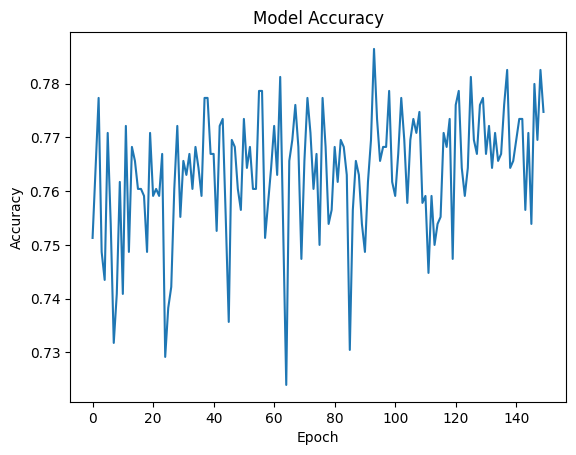

In [56]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

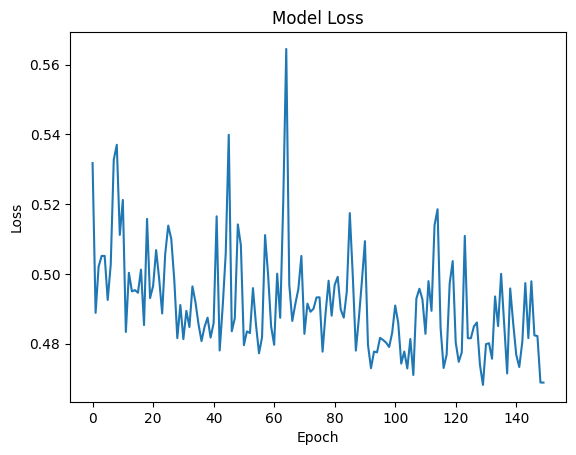

In [62]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')


## `ii` Deep network


In [92]:
model_2 = Sequential()

model_2.add(Dense(8, activation="relu", input_shape=(X.shape[1],)))
model_2.add(Dense(4, activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

model_2.summary()

/home/israa/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

In [93]:
model_2.compile(optimizer=keras.optimizers.Adam(0.01), loss="binary_crossentropy", metrics=["accuracy"])

In [94]:
h = model_2.fit(X, y, batch_size=32, epochs=150)

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3487 - loss: 20.4311   
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5454 - loss: 0.8455 
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6583 - loss: 0.6443 
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7025 - loss: 0.6296 
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6828 - loss: 0.6317 
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6752 - loss: 0.6321 
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6933 - loss: 0.6253 
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7042 - loss: 0.6128 
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6641 - loss: 0.6305 
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7112 - loss: 0.6121 
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6883 - loss: 0.6245 
Epoch 12/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

In [95]:
h.history.keys()

dict_keys(['accuracy', 'loss'])

Text(0, 0.5, 'Loss')

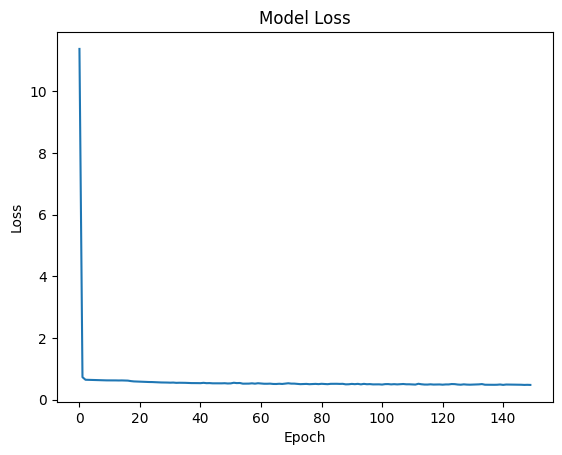

In [96]:
# plot the loss
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')


Text(0, 0.5, 'Accuracy')

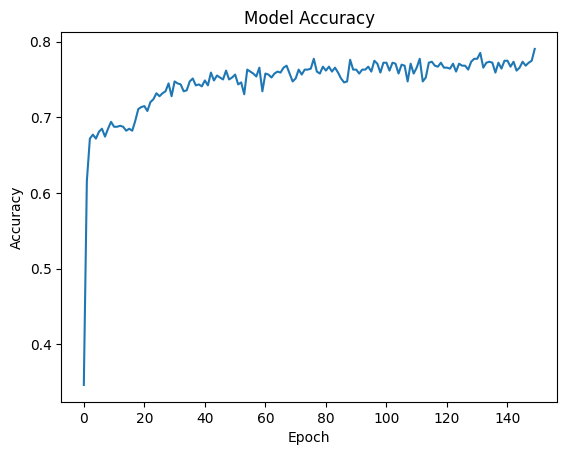

In [97]:
# plot model accuracy
plt.plot(h.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [98]:
evaluation = model_2.evaluate(X, y)
print(evaluation)  

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7736 - loss: 0.4935 
[0.48020219802856445, 0.7903645634651184]


In [99]:
evaluation = model_2.evaluate(X, y)
print(f"Accuracy: {evaluation[1]:.4f}")  

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7736 - loss: 0.4935 
Accuracy: 0.7904


## `iii` Deeper network


In [108]:
model_3 = Sequential()

model_3.add(Dense(8, activation="relu", input_shape=(X.shape[1],)))
model_3.add(Dense(4, activation="relu"))
model_3.add(Dense(1, activation="sigmoid"))

model_3.summary()

/home/israa/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

In [109]:
model_3.compile(optimizer=keras.optimizers.Adam(0.01), loss="binary_crossentropy", metrics=["accuracy"])

In [110]:
h = model_3.fit(X, y, batch_size=32, epochs=150)

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5741 - loss: 19.1775   
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5047 - loss: 2.9333 
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5829 - loss: 1.0328 
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6660 - loss: 0.7085 
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6114 - loss: 0.6805 
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6179 - loss: 0.7520 
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6699 - loss: 0.6376 
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6605 - loss: 0.6251 
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6742 - loss: 0.6069 
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6852 - loss: 0.5963 
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6226 - loss: 0.6572 
Epoch 12/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [111]:
h.history.keys()

dict_keys(['accuracy', 'loss'])

Text(0, 0.5, 'Loss')

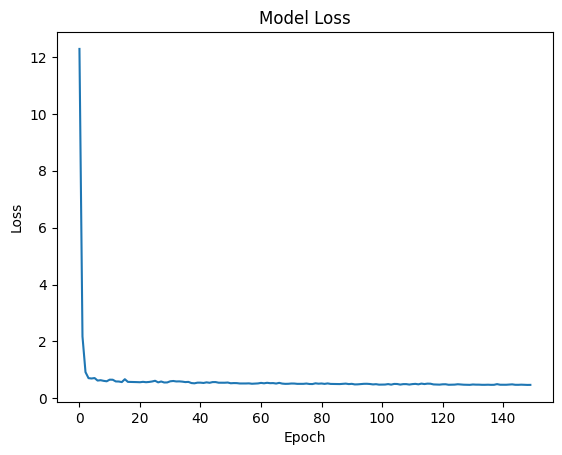

In [112]:
# plot the loss
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')


Text(0, 0.5, 'Accuracy')

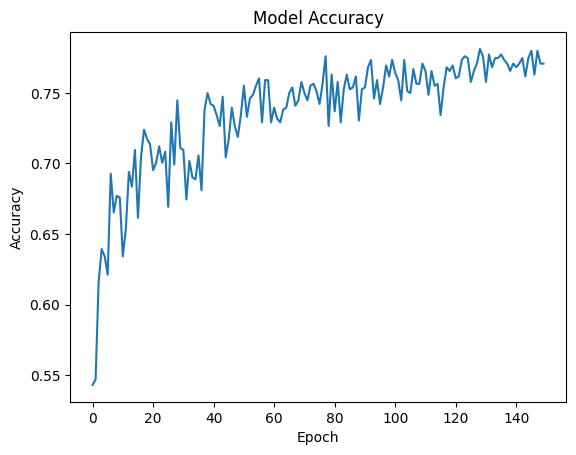

In [113]:
# plot model accuracy
plt.plot(h.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


In [114]:
evaluation = model_3.evaluate(X, y)
print(evaluation)  

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7220 - loss: 0.5336 
[0.5001192688941956, 0.74609375]


In [115]:
evaluation = model_3.evaluate(X, y)
print(f"Accuracy: {evaluation[1]:.4f}")  

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7220 - loss: 0.5336 
Accuracy: 0.7461


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$